**Entrenamiento de un perceptrón multicapa utilizando el ejemplo de la operación lógica XOR.**

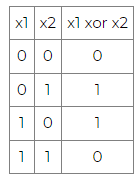

Para resolver este problema, necesitarás crear un perspron multicapa del siguiente tipo:

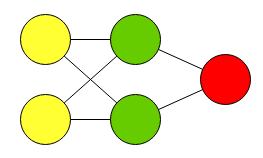

In [1]:
import torch
from torch import nn
from torchsummary import summary

# Detect device
tensor_device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu') 

**Preparando datos de entrenamiento**

In [2]:
data_train = [
		{ "in": [0, 0], "out": [0] },
		{ "in": [0, 1], "out": [1] },
		{ "in": [1, 0], "out": [1] },
		{ "in": [1, 1], "out": [0] },
]

# Esta es una serie de preguntas y respuestas correctas

Hagamos dos operaciones de mapa que transformen la matriz *data_train* por separado en una matriz de preguntas y respuestas.

In [3]:
tensor_train_x = list(map(lambda item: item["in"], data_train))
tensor_train_y = list(map(lambda item: item["out"], data_train))

Convierta a un tensor float32 en tensor_device.

In [4]:
tensor_train_x = torch.tensor(tensor_train_x).to(torch.float32).to(tensor_device)
tensor_train_y = torch.tensor(tensor_train_y).to(torch.float32).to(tensor_device)

In [5]:
print ("Input:")
print (tensor_train_x)
print ("Shape:", tensor_train_x.shape) # dimensión vectorial
print ("")
print ("Answers:")
print (tensor_train_y)
print ("Shape:", tensor_train_y.shape) # dimensión vectorial

Input:
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
Shape: torch.Size([4, 2])

Answers:
tensor([[0.],
        [1.],
        [1.],
        [0.]])
Shape: torch.Size([4, 1])


**Creando un modelo de red neuronal**

La arquitectura de la red neuronal será la siguiente.

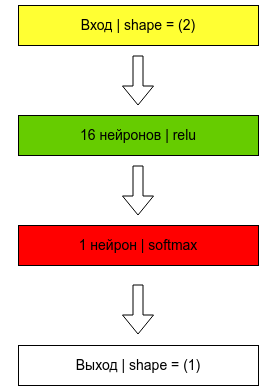

Crea un modelo:

In [6]:
input_shape = 2
output_shape = 1

model = nn.Sequential(
	nn.Linear(input_shape, 16),
	nn.ReLU(),
	nn.Linear(16, output_shape)
)

summary(model, (input_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


Establezcamos parámetros de optimización para el modelo:

In [7]:
# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

# mean squared error
loss = nn.MSELoss()

# Batch size
batch_size = 2

# Epochs
epochs = 1000

In [8]:
summary(model, (input_shape,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              48
              ReLU-2                   [-1, 16]               0
            Linear-3                    [-1, 1]              17
Total params: 65
Trainable params: 65
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Entrenamiento de redes neuronales**

In [9]:
history = []

# Movamos el modelo al dispositivo
model = model.to(tensor_device)

for i in range(epochs):
	
	# Calculemos el resultado del modelo
	model_res = model(tensor_train_x)
	
	# Encontremos el valor de error entre la respuesta del modelo y las respuestas correctas
	loss_value = loss(model_res, tensor_train_y)
	
	# Agreguemos el valor del error al historial para mostrarlo más en el gráfico
	loss_value_item = loss_value.item()
	history.append(loss_value_item)
	
	# Calculemos el gradiente
	optimizer.zero_grad()
	loss_value.backward()
	
	# Optimizamos
	optimizer.step()
	
	# Detenga el entrenamiento si el error es inferior a 0,01
	if loss_value_item < 0.01:
		break
	
	# Información de depuración
	if i % 10 == 0:
		print (f"{i+1},\t loss: {loss_value_item}")
	
	# Borrar el caché CUDA
	if torch.cuda.is_available():
		torch.cuda.empty_cache()

1,	 loss: 0.6727659106254578
11,	 loss: 0.5679864883422852
21,	 loss: 0.47984760999679565
31,	 loss: 0.40722036361694336
41,	 loss: 0.3487725555896759
51,	 loss: 0.30246996879577637
61,	 loss: 0.2660781443119049
71,	 loss: 0.23897773027420044
81,	 loss: 0.2185525745153427
91,	 loss: 0.20310145616531372
101,	 loss: 0.19111007452011108
111,	 loss: 0.18136955797672272
121,	 loss: 0.1729559302330017
131,	 loss: 0.16548506915569305
141,	 loss: 0.15884965658187866
151,	 loss: 0.15265417098999023
161,	 loss: 0.14660212397575378
171,	 loss: 0.14062100648880005
181,	 loss: 0.1346941739320755
191,	 loss: 0.12877386808395386
201,	 loss: 0.12280921638011932
211,	 loss: 0.11699894070625305
221,	 loss: 0.11124340444803238
231,	 loss: 0.10548871755599976
241,	 loss: 0.09974760562181473
251,	 loss: 0.09401551634073257
261,	 loss: 0.0883546695113182
271,	 loss: 0.0827728882431984
281,	 loss: 0.07729518413543701
291,	 loss: 0.07186761498451233
301,	 loss: 0.06656305491924286
311,	 loss: 0.06138625741004

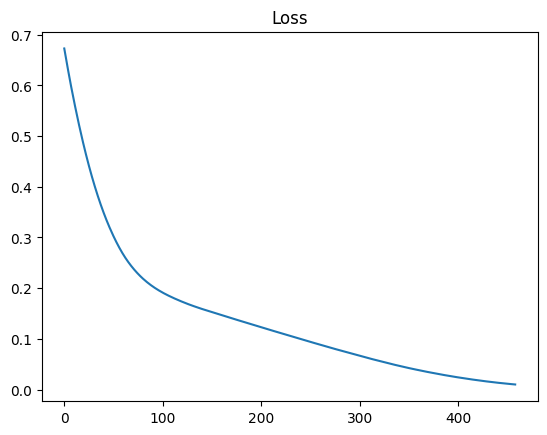

In [10]:
import matplotlib.pyplot as plt

plt.plot(history)
plt.title('Loss')
plt.show()

**Implementación de una red neuronal**

In [11]:
control_x = [
	[0, 0],
	[0, 1],
	[1, 0],
	[1, 1],
]

control_x = torch.tensor(control_x).to(torch.float32).to(tensor_device)

print ("Shape:", control_x.shape)

answer = model( control_x )

for i in range(len(answer)):
	print(control_x[i].tolist(), "->", answer[i].round().tolist())

Shape: torch.Size([4, 2])
[0.0, 0.0] -> [0.0]
[0.0, 1.0] -> [1.0]
[1.0, 0.0] -> [1.0]
[1.0, 1.0] -> [0.0]


Se puede observar que la red neuronal responde **correctamente**.

Separe los datos con la biblioteca **tensorflow**

In [12]:
import tensorflow as tf

*gráficos:*

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, Normalize
from sklearn.metrics import accuracy_score

np.random.seed(10)

colors = ['red', "blue"]
labels_cmap = ListedColormap(colors, 2)
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # R -> W -> B
main_cmap = LinearSegmentedColormap.from_list("main_scheme", colors, N=300)

def show_data(X, y):
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y))
    

def show_descision_boundary(clf, limits, binary=False, X=None, y=None, n_lines=10, show_lines=False,
                           figsize=(5, 5), ax=None):
    if limits is None:
        if X is not None:
            xs = [X[:, 0].min() - .3, X[:, 0].max() + .3]
            ys = [X[:, 1].min() - .3, X[:, 1].max() + .3]
        else:
            xs = [-1, 1]
            ys = [-1, 1]
    else:
        xs, ys = limits
    
    x_min, x_max = xs
    y_min, y_max = ys
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    if ax is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(1, 1, 1)
    
    if binary:
        Z = clf.predict(np.c_[xx.ravel(), xx.ravel()])
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        norm = Normalize(vmin=0.,vmax=1.)
    else:
        Z = clf(np.c_[xx.ravel(), xx.ravel()])
        Z = clf(np.c_[xx.ravel(), yy.ravel()])
        #if clf.prob_output:
        #    norm = Normalize(vmin=0.,vmax=1.)
        #else:
        norm = Normalize(vmin=-10.,vmax=10., clip=True)
        Z = Z.numpy() 
    
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.float32)
    
    ax.contourf(xx, yy, Z, n_lines, alpha=0.4, cmap=main_cmap, norm=norm)
    if show_lines:
        cp = ax.contour(xx, yy, Z, n_lines)
        ax.clabel(cp, inline=True, 
              fontsize=10, colors="green")
    
    if y is not None:
        X = np.array(X)
        y = np.array(y)
        ax.scatter(X[:, 0], X[:, 1], s=120, color=labels_cmap(y),
                   zorder=4)
        

def eval_model(model, X, y):
    accuracy = model.evaluate(X, y)[1]
    if accuracy == 1.0:
        print("Perfect!")
    elif  accuracy > 0.9:
        print("Well done! Can you make 100%?")
    else:
        print("Don't give up!")
    return accuracy

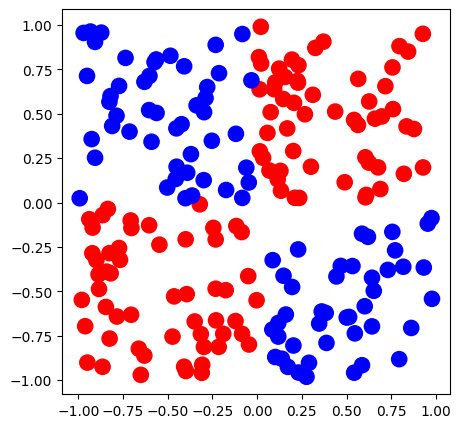

In [14]:
X = np.random.rand(200, 2) - 0.5
y = ((X[:, 0] < 0) ^ (X[:, 1] < 0))
X = X*2
show_data(X, y)

In [15]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(15, input_shape=(2,), activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(1)) 

optimizer = tf.keras.optimizers.Adam(learning_rate=0.05) 
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True) # лосс -- с логитами

model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"]) 
history = model.fit(X, y, epochs=200, verbose=1, batch_size=64, shuffle=True)


Epoch 1/200


4/4 [==============================] - 2s 7ms/step - loss: 0.6459 - accuracy: 0.5800
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5016 - accuracy: 0.8050
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3354 - accuracy: 0.8050
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2243 - accuracy: 0.9250
Epoch 5/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2416 - accuracy: 0.8950
Epoch 6/200
4/4 [==============================] - 0s 7ms/step - loss: 0.1803 - accuracy: 0.9100
Epoch 7/200
4/4 [==============================] - 0s 944us/step - loss: 0.0677 - accuracy: 0.9750
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0936 - accuracy: 0.9600
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9800
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 0.0953 - accuracy: 0.9600
Epoch 11/200
4/4 [======

7/7 [==============================] - 0s 3ms/step - loss: 6.7884e-05 - accuracy: 1.0000
Perfect!


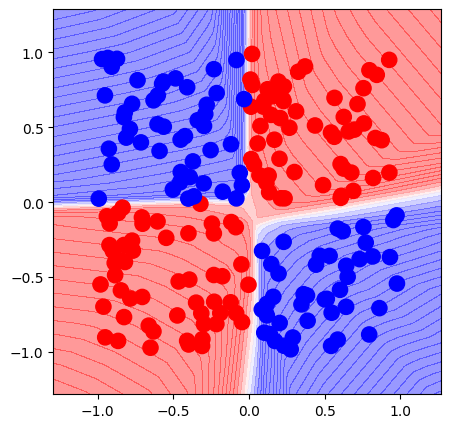

In [16]:
limits = [[-0.6, 0.6], [-0.6, 0.6]]
eval_model(model, X, y)
show_descision_boundary(limits=None, clf=model, binary=False,
                                X=X,
                                y=y, 
                                n_lines=50,
                                show_lines=False)